# Thématique 5 - Analyse multivariée et analyse en composantes principales

### Importation des librairies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data pre-processing

In [2]:
# File pre-processing
filepath = "../data"
filename = "EspVieACPData.csv"
file = os.path.join(filepath, filename)

# Reading data
df_original = pd.read_csv(file, delimiter=";")
df = df_original.copy()

# Data display
df.describe()

,TNAT,TMORT,EV,T65,NBENF,TCR
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,21.373061,8.529286,69.701429,7.764565,2.760867,1.273827
std,10.262112,3.528179,9.871590,5.278277,1.336750,1.004232
min,7.700000,1.520000,44.970000,1.044821,0.990000,-0.800000
25%,12.555000,5.935000,64.122500,3.554450,1.837500,0.420000
50%,19.380000,7.790000,72.605000,5.787767,2.290000,1.195000
75%,28.167500,10.375000,76.855000,12.188295,3.565000,2.072500
max,51.990000,18.600000,83.370000,23.275033,6.960000,3.780000


Cet ensemble de données montre l'espérance de vie pour chaque pays. Ici, nous avons 196 pays.

L'espérance de vie moyenne se situe entre 45 et 83 ans. En d'autres termes, quel que soit son pays d'origine, un individu a une espérance de vie d'au moins 45 ans. Alors que l'espérance de vie moyenne est d'environ 69 ans. Nous devons vérifier la distribution des données à l'aide d'un diagramme en boîte.

Les différentes variables représentent :
  - **TNAT** : Taux de natalité
  - **TMORT** : Taux de mortalité
  - **EV** : Espérance de vie
  - **T65** : Pourcentage de personnes âgées de plus de 65 ans
  - **NBENF** : Nombre d'enfants par famille
  - **TCR** : taux de croissance

In [3]:
df.head()

,TNAT,TMORT,EV,T65,NBENF,TCR,CONT
Afghanistan,45.49,18.60,44.97,2.254847,6.35,3.33,ASIE
AfriquedSud,21.22,15.24,52.28,4.737313,2.45,0.57,AFRIQUE
Albanie,15.02,6.52,77.02,9.907497,1.85,0.51,EUROPE
Algerie,20.48,4.91,73.13,4.690466,2.30,1.48,AFRIQUE
Allemagne,7.95,10.77,80.33,20.670035,1.33,-0.16,EUROPE


In [4]:
df.tail()

,TNAT,TMORT,EV,T65,NBENF,TCR,CONT
VietNam,16.34,5.44,75.12,6.365578,1.98,1.05,ASIE
Yemen,35.54,6.61,64.30,2.416463,4.85,2.78,ASIE
Zambie,41.16,15.36,48.17,3.072195,5.53,2.44,AFRIQUE
Zimbabwe,29.55,13.89,48.31,4.132598,3.22,1.72,AFRIQUE
IlesVierges,12.86,7.58,79.47,14.911557,2.09,-0.21,AMERSUD


In [5]:
df.shape

(196, 7)

Il y a 196 pays et 7 variables.

In [6]:
df.dtypes

TNAT     float64
TMORT    float64
EV       float64
T65      float64
NBENF    float64
TCR      float64
CONT      object
dtype: object

Dans cette étude, à l'exception du continent sur lequel se situe le pays, nous ne disposons que de variables quantitatives.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, Afghanistan to IlesVierges
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TNAT    196 non-null    float64
 1   TMORT   196 non-null    float64
 2   EV      196 non-null    float64
 3   T65     196 non-null    float64
 4   NBENF   196 non-null    float64
 5   TCR     196 non-null    float64
 6   CONT    196 non-null    object 
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


In [8]:
df.columns

Index(['TNAT', 'TMORT', 'EV', 'T65', 'NBENF', 'TCR', 'CONT'], dtype='object')

In [9]:
df.isnull().sum()

TNAT     0
TMORT    0
EV       0
T65      0
NBENF    0
TCR      0
CONT     0
dtype: int64

Il n'y a pas de données manquantes dans ce jeu de données.

In [10]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(), df[col].unique()))

TNAT :[45.49 21.22 15.02 20.48  7.95 41.38 12.54 22.39 16.87 15.47 11.33 12.56
  9.01 19.08 16.17 17.18 20.23 11.07 11.23 23.49 20.72  9.98 25.54  9.02
 23.98 18.86 14.72  9.71 45.25 33.78 38.1  24.65 35.26 10.76 23.12 14.64
 13.64  7.7   8.59 11.65 19.45 30.64 32.82 13.63  9.18 16.3   9.72 10.19
 33.51 10.99 27.12 23.8  13.3  19.77 34.88 11.11 13.78 36.65 20.04 11.21
 11.62 26.22 35.3  12.06 31.42 19.62 17.1   9.34 13.72 17.65 31.35 38.17
 40.05 37.66 16.83 23.54 26.6  26.13  9.9   8.87 28.64 21.56 17.36 29.5
 18.33 15.18 14.4  18.8   8.82 18.84 24.43 19.39 37.22 21.82 16.84 26.66
 28.01 10.74 15.54 22.2  36.84  9.8  11.3  10.85 34.25 19.37 38.79 18.93
 41.46  9.13 20.06 11.92 14.01 32.12 23.61 17.6  23.96 12.67 18.63 12.07
 36.68 19.71 26.35 23.74 51.99 37.98 11.91 15.72 13.59 24.1  21.75 44.9
 20.22 29.17 33.69 19.58 29.94 23.48 10.78 23.68  9.88 17.52 12.96  9.4
 19.98 21.43 10.82  9.83 12.14 11.24 40.63 33.87 43.22 17.55 22.34 17.25
 20.08 21.83 11.44 39.11  7.8  10.36 42.94 29.64

In [11]:
df

,TNAT,TMORT,EV,T65,NBENF,TCR,CONT
Afghanistan,45.49,18.60,44.97,2.254847,6.35,3.33,ASIE
AfriquedSud,21.22,15.24,52.28,4.737313,2.45,0.57,AFRIQUE
Albanie,15.02,6.52,77.02,9.907497,1.85,0.51,EUROPE
Algerie,20.48,4.91,73.13,4.690466,2.30,1.48,AFRIQUE
Allemagne,7.95,10.77,80.33,20.670035,1.33,-0.16,EUROPE
...,...,...,...,...,...,...,...
VietNam,16.34,5.44,75.12,6.365578,1.98,1.05,ASIE
Yemen,35.54,6.61,64.30,2.416463,4.85,2.78,ASIE
Zambie,41.16,15.36,48.17,3.072195,5.53,2.44,AFRIQUE
Zimbabwe,29.55,13.89,48.31,4.132598,3.22,1.72,AFRIQUE


## Analyse des données

Avant de commencer à analyser les données à l'aide de graphiques, il a été nécessaire de nettoyer le fichier :
- Remplacer les , par des . afin que les données soient considérées comme des flottants et non comme des objets.
- Supprimer l'excès de . : certaines valeurs CONT, en particulier ASIE, ont été marquées par un . tel que : ASIE.

### Boîtes de Tukey

/tmp/ipykernel_7519/4208421448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CONT', y='EV', data=df, showmeans=True, meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, palette=["r", "g", "b", "pink", "orange", "purple"])



Tableau des statistiques par continent:
  Continent    Min  Q1 (25%)  Médiane (50%)    Moyenne  Q3 (75%)    Max
0      ASIE  44.97   67.5350         72.495  71.722000   75.8625  83.37
1   AFRIQUE  46.27   51.1200         56.560  58.071273   62.4800  76.89
2    EUROPE  67.50   74.4125         78.895  77.233500   80.4500  82.34
3   AMERSUD  61.87   72.5400         74.720  74.515946   76.9000  80.04
4   OCEANIE  61.89   69.3425         72.335  72.842500   76.2350  81.99
5   AMERNOR  79.73   80.0950         80.460  80.460000   80.8250  81.19


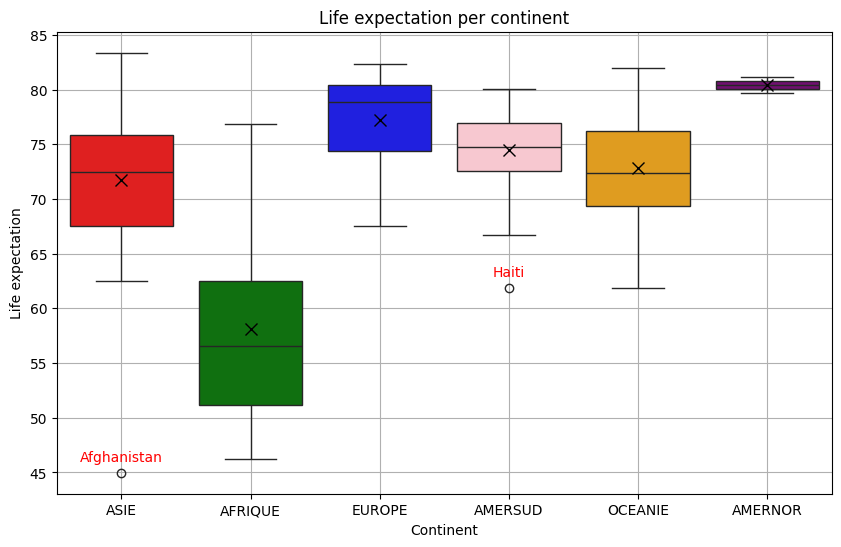

In [12]:
# Initialisation de variables
outliers_list = []
stats = []

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='CONT', y='EV', data=df, showmeans=True, meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, palette=["r", "g", "b", "pink", "orange", "purple"])

# Searching outliers
for continent in df['CONT'].unique():
    subset = df[df['CONT'] == continent]
    Q1 = subset['EV'].quantile(0.25)
    Q3 = subset['EV'].quantile(0.75)
    IQR = Q3 - Q1
    median = subset['EV'].median()
    mean = subset['EV'].mean()
    min_value = subset['EV'].min()
    max_value = subset['EV'].max()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ajouter les statistiques dans le tableau
    stats.append({
        'Continent': continent,
        'Min': min_value,
        'Q1 (25%)': Q1,
        'Médiane (50%)': median,
        'Moyenne': mean,
        'Q3 (75%)': Q3,
        'Max': max_value
    })
    
    # Selecting outliers
    outliers = subset[(subset['EV'] < lower_bound) | (subset['EV'] > upper_bound)]
    for index, row in outliers.iterrows():
        outliers_list.append(index)
        plt.text(x=df['CONT'].unique().tolist().index(continent), 
                 y=row['EV'] + 1.05, 
                 s=index, 
                 color='red', 
                 ha='center')
        
# Convertir les statistiques en DataFrame
stats_df = pd.DataFrame(stats)

# Affichage du tableau de statistiques
print("\nTableau des statistiques par continent:")
print(stats_df)

plt.title('Life expectation per continent')
plt.xlabel('Continent')
plt.ylabel('Life expectation')
plt.grid(True)

# Plot display
plt.show()

Globalement, l'Europe a la meilleure espérance de vie, avec une moyenne supérieure à 75 ans, même si elle est tirée vers le bas par des pays où l'espérance de vie est assez faible. En effet, la moyenne est inférieure à la médiane, ce qui signifie que si une majorité de pays ont une espérance de vie supérieure à la moyenne, certains ont une espérance de vie très faible.

L'espérance de vie sur le continent africain est beaucoup plus faible qu'ailleurs. De plus, il s'agit de la distribution où les données sont les plus dispersées. Malgré cela, ce n'est pas le continent où l'espérance de vie est la plus faible ; c'est l'Asie, l'Afghanistan ayant une espérance de vie de 44,97 ans.

L'Amérique du Nord a une moyenne égale à la médiane, mais c'est normal puisqu'il n'y a que 2 points de données avec cette valeur. D'où la faible dispersion des données. D'autant plus que le Canada et les États-Unis sont deux pays très développés, chacun ayant une espérance de vie très élevée (environ 80 ans).

### Nuage de points 2 à 2

/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 


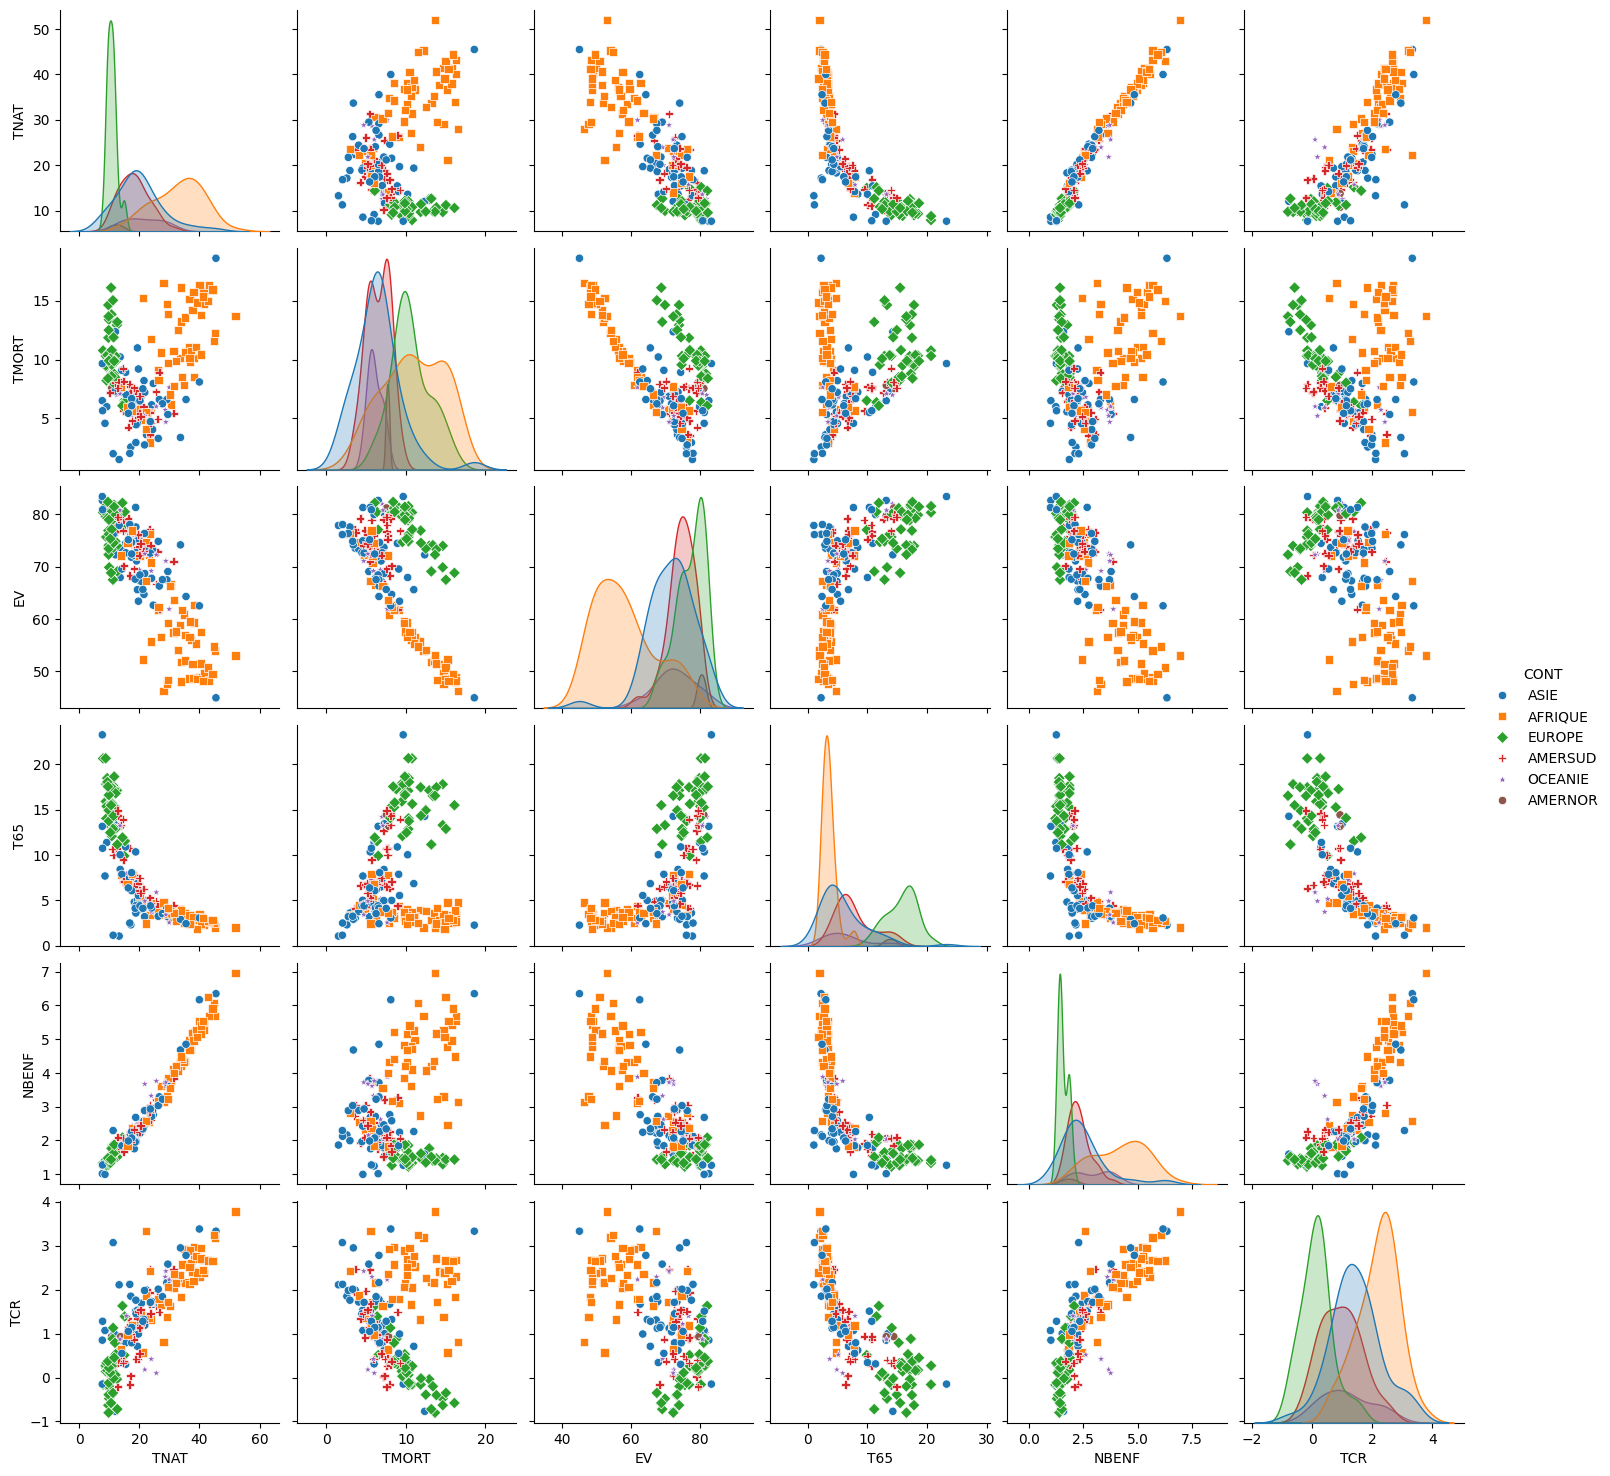

In [13]:
sns.pairplot(df, diag_kind="kde", hue="CONT", markers=["o", "s", "D", "P", "*"])

Certaines variables apparaissent fortement corrélées, notamment le TNAT et le FRENB, dont les résultats pourraient être modélisés par une droite de régression. De plus, chaque contenant est représenté par son propre marqueur, ce qui permet de les distinguer encore plus facilement.

D'autres combinaisons sont plus difficiles à interpréter, comme le TMORT en fonction du TCR.

### Centrage et réduction des données

/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 


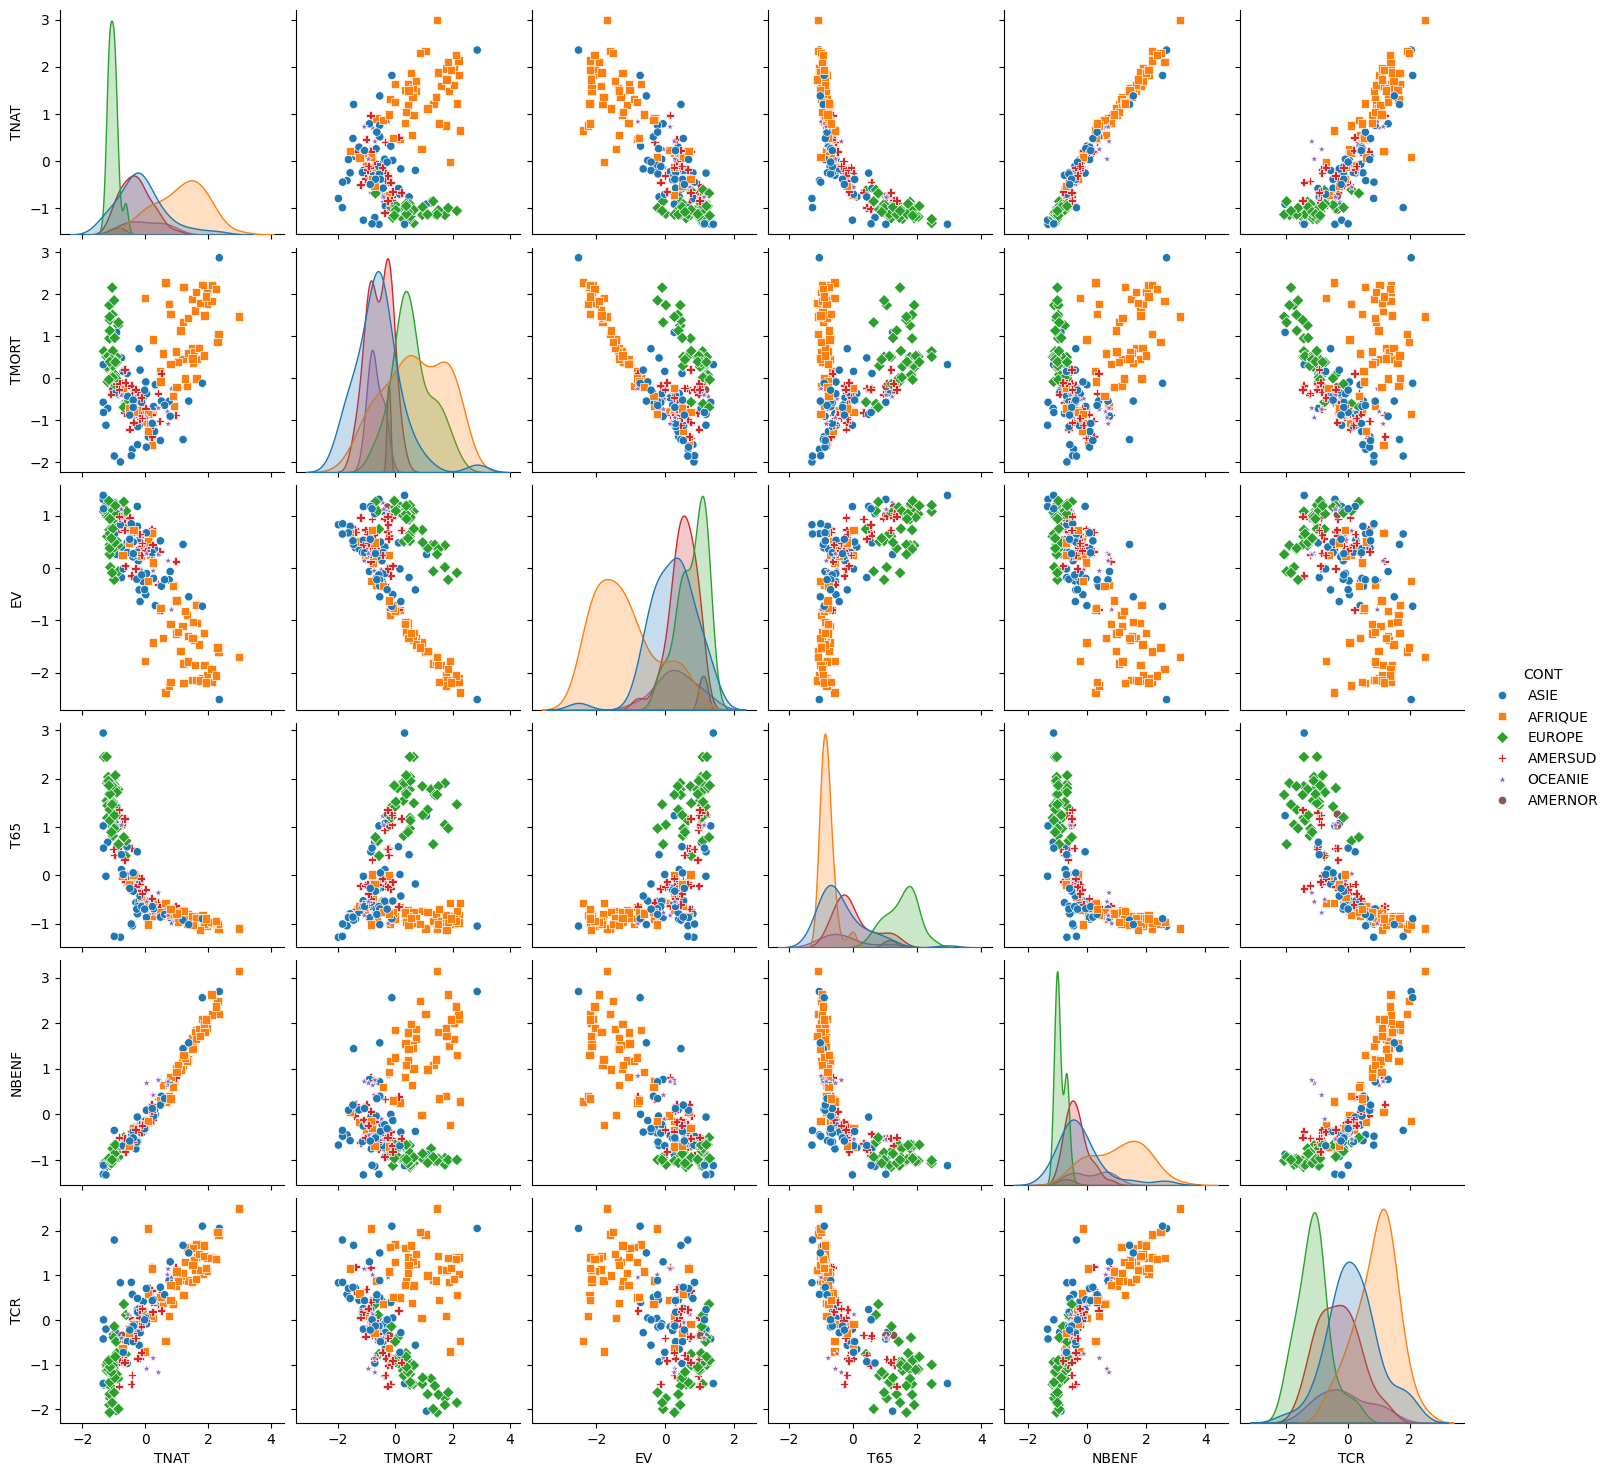

In [14]:
from sklearn.preprocessing import StandardScaler

# Centering and reducting data
scaler = StandardScaler()
df_scaled = df.copy()
variables_to_scale = ['TNAT', 'TMORT', 'EV', 'T65', 'NBENF', 'TCR']
df_scaled[variables_to_scale] = scaler.fit_transform(df[variables_to_scale])

# Pairplot on centered and reducted data
sns.pairplot(df_scaled, diag_kind="kde", hue="CONT", markers=["o", "s", "D", "P", "*"])

Visuellement, les deux graphiques semblent similaires, mais l'échelle des données est très différente. Les données sont bien centrées autour de 0 et la réduction donne une variance de 1.

## Traitement des données

### ACP

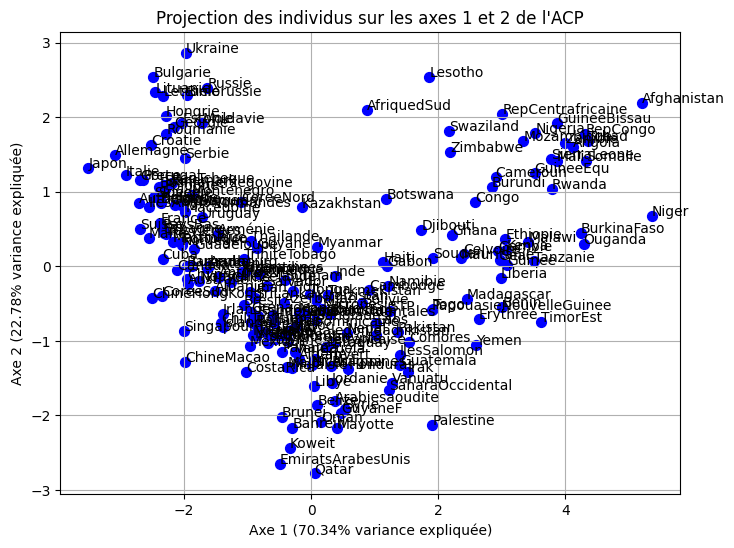

In [15]:
from sklearn.decomposition import PCA

# Réaliser l'ACP
pca = PCA()
components = pca.fit_transform(df_scaled[['TNAT', 'TMORT', 'EV', 'T65', 'NBENF', 'TCR']])

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Affichage des individus sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c='blue', s=50)

# Ajouter les noms des points (optionnel, si noms des pays sont disponibles)
for i, country in enumerate(df_scaled.index):
    plt.text(components[i, 0], components[i, 1], country)

# Titres et étiquettes
plt.title('Projection des individus sur les axes 1 et 2 de l\'ACP')
plt.xlabel(f'Axe 1 ({explained_variance[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'Axe 2 ({explained_variance[1]*100:.2f}% variance expliquée)')
plt.grid(True)
plt.show()

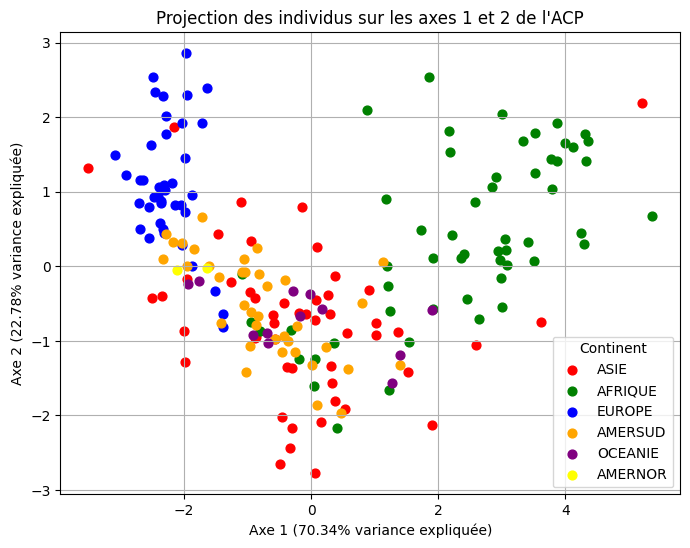

In [16]:
palette = {
    'ASIE': 'red',
    'AFRIQUE': 'green',
    'EUROPE': 'blue',
    'AMERSUD': 'orange',
    'OCEANIE': 'purple',
    'AMERNOR': 'yellow'
}

# Affichage des individus sur les deux premières composantes principales
plt.figure(figsize=(8, 6))

for continent in df['CONT'].unique():
    indices = df['CONT'] == continent
    plt.scatter(components[indices, 0], components[indices, 1], s=40, label=continent, color=palette.get(continent, 'black'))

# Titres et étiquettes
plt.title('Projection des individus sur les axes 1 et 2 de l\'ACP')
plt.xlabel(f'Axe 1 ({explained_variance[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'Axe 2 ({explained_variance[1]*100:.2f}% variance expliquée)')
plt.grid(True)
plt.legend(title="Continent")
plt.show()

### Graphique des vecteurs propres

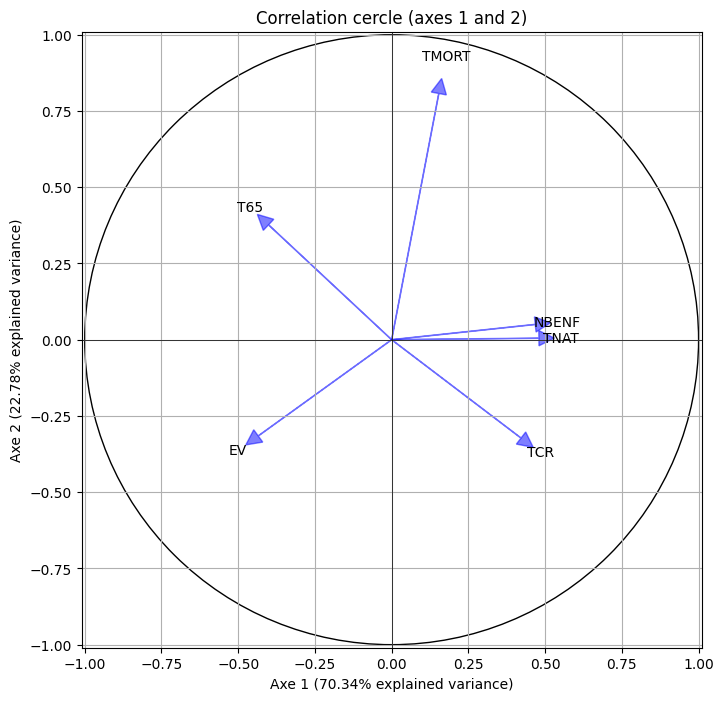

In [17]:
# Eigen vectors
components = pca.components_

# Plot
plt.figure(figsize=(8, 8))

# Pie chart
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

# Abscissa and ordinate limits
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)

# Drawing eigen vectors
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * 1.15, y * 1.15, df.columns[i], ha='center', va='center')

# Abscissa and ordinate labels
plt.xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained variance)')
plt.ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained variance)')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Correlation cercle (axes 1 and 2)")

# Plot display
plt.show()

- Le NBENF (nombre d'enfants par famille) et le TNAT (taux de natalité) sont fortement corrélés positivement. Cela signifie que plus il y a d'enfants par famille, plus le taux de natalité est élevé.

- À l'inverse, le taux de natalité et le taux de mortalité sont perpendiculaires, c'est-à-dire qu'ils n'ont aucune corrélation entre eux.

### Histogramme des valeurs propres

     Comp  Eigenvalue  Percentage of Variance  Cumulative Variance
0  Comp 1    4.242341               70.344938            70.344938
1  Comp 2    1.373824               22.780245            93.125183
2  Comp 3    0.293894                4.873248            97.998431
3  Comp 4    0.097842                1.622372            99.620803
4  Comp 5    0.013740                0.227832            99.848634
5  Comp 6    0.009129                0.151366           100.000000


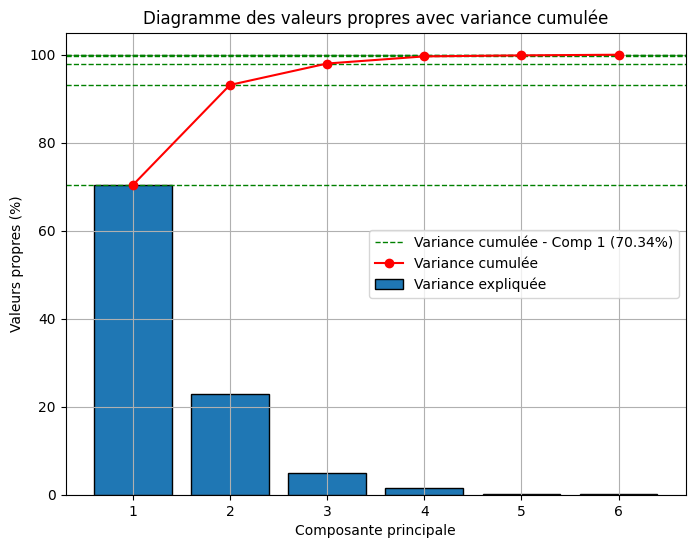

In [18]:
# Eigen value
vp = pca.explained_variance_

# Initialization of variables
data_vp = []
variance_sum_list = []
variance_sum = 0

# For each eigenvalue
for i in range(len(vp)):
    variance_sum += explained_variance[i]
    variance_sum_list.append(variance_sum*100)
    data_vp.append([f"Comp {i+1}", vp[i], explained_variance[i]*100, variance_sum_list[i]])

# Creating a new dataframe for eigenvalues and explained variance
df_vp = pd.DataFrame(data_vp, columns=["Comp", "Eigenvalue", "Percentage of Variance", "Cumulative Variance"])

# Tab display
print(df_vp)

# Chart
plt.figure(figsize=(8, 6))

# Horizontal line for each variance
for i, var_cum in enumerate(variance_sum_list):
    plt.axhline(y=var_cum, color="green", linestyle="--", linewidth=1, label=f'Variance cumulée - Comp {i+1} ({round(var_cum, 2)}%)' if i == 0 else "") 

# Tracer la courbe pour la variance cumulée
plt.plot(range(1, len(vp) + 1), variance_sum_list, c='red', marker='o', linestyle='-', label='Variance cumulée')

# Bar plot
plt.bar(range(1, len(vp) + 1), explained_variance*100, edgecolor='black', label='Variance expliquée')

# Labels and title
plt.xlabel('Composante principale')
plt.ylabel('Valeurs propres (%)')
plt.title('Diagramme des valeurs propres avec variance cumulée')
plt.xticks(range(1, len(vp) + 1))
plt.grid(True)

# Legend
plt.legend()

# Plot display
plt.show()


Ce diagramme montre quelles sont les composantes principales qui capturent le plus de variance dans les données. Ici, c'est de loin la première composante qui capte la majorité de la variance, soit 70 %.

Typiquement, seules les premières composantes principales capturent la majeure partie de l'information, et les suivantes contribuent peu, ce qui signifie que seules les 2 premières composantes sont retenues.

### Contribution

In [19]:
cos2 = components**2

# Keep only necessary columns
variables = df_scaled[['TNAT', 'TMORT', 'EV', 'T65', 'NBENF', 'TCR']].columns

# Creating a dataframe for cos²
cos2_df = pd.DataFrame(cos2.T, index=variables, columns=[f'Axe {i+1}' for i in range(components.shape[0])])

# cos² display
print("Cos² pour chaque variable sur les composantes principales :")
print(cos2_df*100)

Cos² pour chaque variable sur les composantes principales :
           Axe 1      Axe 2      Axe 3      Axe 4      Axe 5      Axe 6
TNAT   23.012426   0.002454   2.893674  14.137637  22.101448  37.852361
TMORT   2.360390  65.197964   0.048784   6.152197  15.808043  10.432622
EV     18.890774   9.956245  19.915650   2.938998  24.296336  24.001996
T65    16.085526  14.193446  42.249801   0.021352  22.464712   4.985163
NBENF  21.883204   0.251335  15.388458  24.438395  15.312248  22.726359
TCR    17.767679  10.398556  19.503633  52.311420   0.017213   0.001499


In [20]:
# Compute cos² sum
sum_cos2_tnat = cos2_df.loc["TNAT"].sum()

# Afficher la somme du cos²
print(f"Somme du cos² pour TNAT : {sum_cos2_tnat}")

Somme du cos² pour TNAT : 0.9999999999999998


In [21]:
# Cos² pour TMORT sur chaque axe
cos2_tmort = cos2_df.loc["TMORT"]

# Afficher les cos² de TMORT
print("\nCos² de TMORT sur chaque axe :")
print(cos2_tmort)

# Identifier les axes où TMORT est bien représentée (par exemple, cos² > 0.5)
axes_tmort_bien_rep = cos2_tmort[cos2_tmort > 0.5]

print(f"\nTMORT est bien représentée sur les axes : {axes_tmort_bien_rep.index.tolist()}")


Cos² de TMORT sur chaque axe :
Axe 1    0.023604
Axe 2    0.651980
Axe 3    0.000488
Axe 4    0.061522
Axe 5    0.158080
Axe 6    0.104326
Name: TMORT, dtype: float64

TMORT est bien représentée sur les axes : ['Axe 2']


In [22]:
# Contribution des variables à l'axe 1 (cos² sur l'axe 1)
contribution_axis_1 = cos2_df['Axe 1']

# Afficher les contributions à l'axe 1
print("\nContribution des variables à l'Axe 1 :")
print(contribution_axis_1)

# Identifier les variables qui contribuent le plus à l'Axe 1 (par exemple, cos² élevé)
variables_contribuant_axis_1 = contribution_axis_1[contribution_axis_1 > 0.2]  # seuil arbitraire

print(f"\nVariables qui contribuent à l'Axe 1 : {variables_contribuant_axis_1.index.tolist()}")


Contribution des variables à l'Axe 1 :
TNAT     0.230124
TMORT    0.023604
EV       0.188908
T65      0.160855
NBENF    0.218832
TCR      0.177677
Name: Axe 1, dtype: float64

Variables qui contribuent à l'Axe 1 : ['TNAT', 'NBENF']


## Suppression des individus atypiques

Nous allons essayer d'effectuer la même analyse après avoir retiré les deux individus atypiques (Afghanistan et Haiti).

**Spoiler** : Ca ne change rien.

In [23]:
# Suppression de l'individu atypique
df_clean = df.drop(outliers_list)

df_clean

,TNAT,TMORT,EV,T65,NBENF,TCR,CONT
AfriquedSud,21.22,15.24,52.28,4.737313,2.45,0.57,AFRIQUE
Albanie,15.02,6.52,77.02,9.907497,1.85,0.51,EUROPE
Algerie,20.48,4.91,73.13,4.690466,2.30,1.48,AFRIQUE
Allemagne,7.95,10.77,80.33,20.670035,1.33,-0.16,EUROPE
Angola,41.38,15.72,48.55,2.483430,5.44,2.68,AFRIQUE
...,...,...,...,...,...,...,...
VietNam,16.34,5.44,75.12,6.365578,1.98,1.05,ASIE
Yemen,35.54,6.61,64.30,2.416463,4.85,2.78,ASIE
Zambie,41.16,15.36,48.17,3.072195,5.53,2.44,AFRIQUE
Zimbabwe,29.55,13.89,48.31,4.132598,3.22,1.72,AFRIQUE


### Boîtes de Tukey


Tableau des statistiques par continent:
  Continent    Min  Q1 (25%)  Médiane (50%)    Moyenne  Q3 (75%)    Max
0   AFRIQUE  46.27   51.1200         56.560  58.071273    62.480  76.89
1    EUROPE  67.50   74.4125         78.895  77.233500    80.450  82.34
2   AMERSUD  66.66   72.7425         74.965  74.867222    76.950  80.04
3      ASIE  62.52   67.6100         72.580  72.267959    76.110  83.37
4   OCEANIE  61.89   69.3425         72.335  72.842500    76.235  81.99
5   AMERNOR  79.73   80.0950         80.460  80.460000    80.825  81.19


/tmp/ipykernel_7519/3812101843.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CONT', y='EV', data=df_clean, showmeans=True,


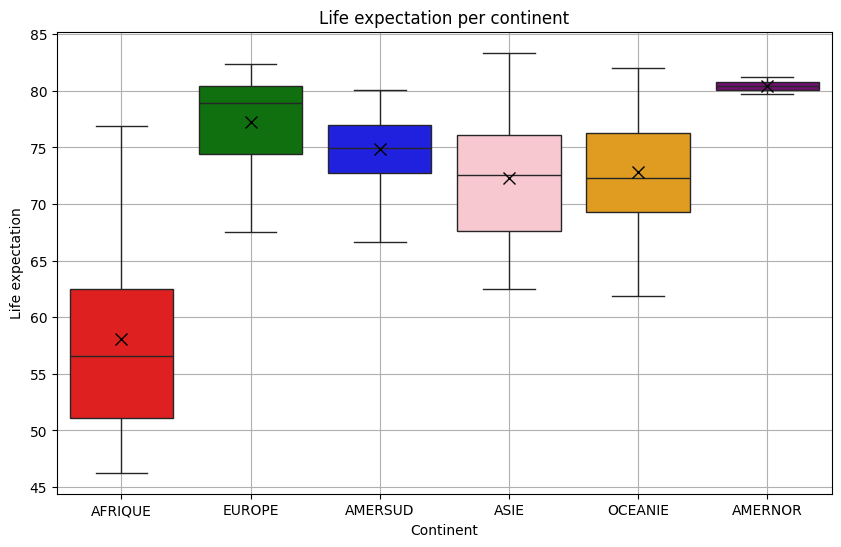

In [24]:
# Calcul des statistiques pour chaque continent
stats = []

for continent in df_clean['CONT'].unique():
    subset = df_clean[df_clean['CONT'] == continent]
    
    Q1 = subset['EV'].quantile(0.25)
    Q3 = subset['EV'].quantile(0.75)
    IQR = Q3 - Q1
    median = subset['EV'].median()
    mean = subset['EV'].mean()
    min_value = subset['EV'].min()
    max_value = subset['EV'].max()
    
    # Ajouter les statistiques dans le tableau
    stats.append({
        'Continent': continent,
        'Min': min_value,
        'Q1 (25%)': Q1,
        'Médiane (50%)': median,
        'Moyenne': mean,
        'Q3 (75%)': Q3,
        'Max': max_value
    })

# Convertir les statistiques en DataFrame
stats_df = pd.DataFrame(stats)

# Affichage du tableau de statistiques
print("\nTableau des statistiques par continent:")
print(stats_df)

# Affichage du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='CONT', y='EV', data=df_clean, showmeans=True, 
            meanprops={'marker':'x','markeredgecolor':'black','markersize':'8'}, 
            palette=["r", "g", "b", "pink", "orange", "purple"])

plt.title('Life expectation per continent')
plt.xlabel('Continent')
plt.ylabel('Life expectation')
plt.grid(True)

# Affichage du graphique
plt.show()

Maintenant que les individus atypiques ont été supprimés, l'espérance de vie moyenne est égale à la médiane. Ce qui veut dire que la distribution des données est symétrique et donc l'espérance de vie est répartie de façon équilibré de 74 ans. ALors que pour l'Asie, la moyenne est quasi égale à la médiane.

/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/cytech/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1615: UserWarning: 


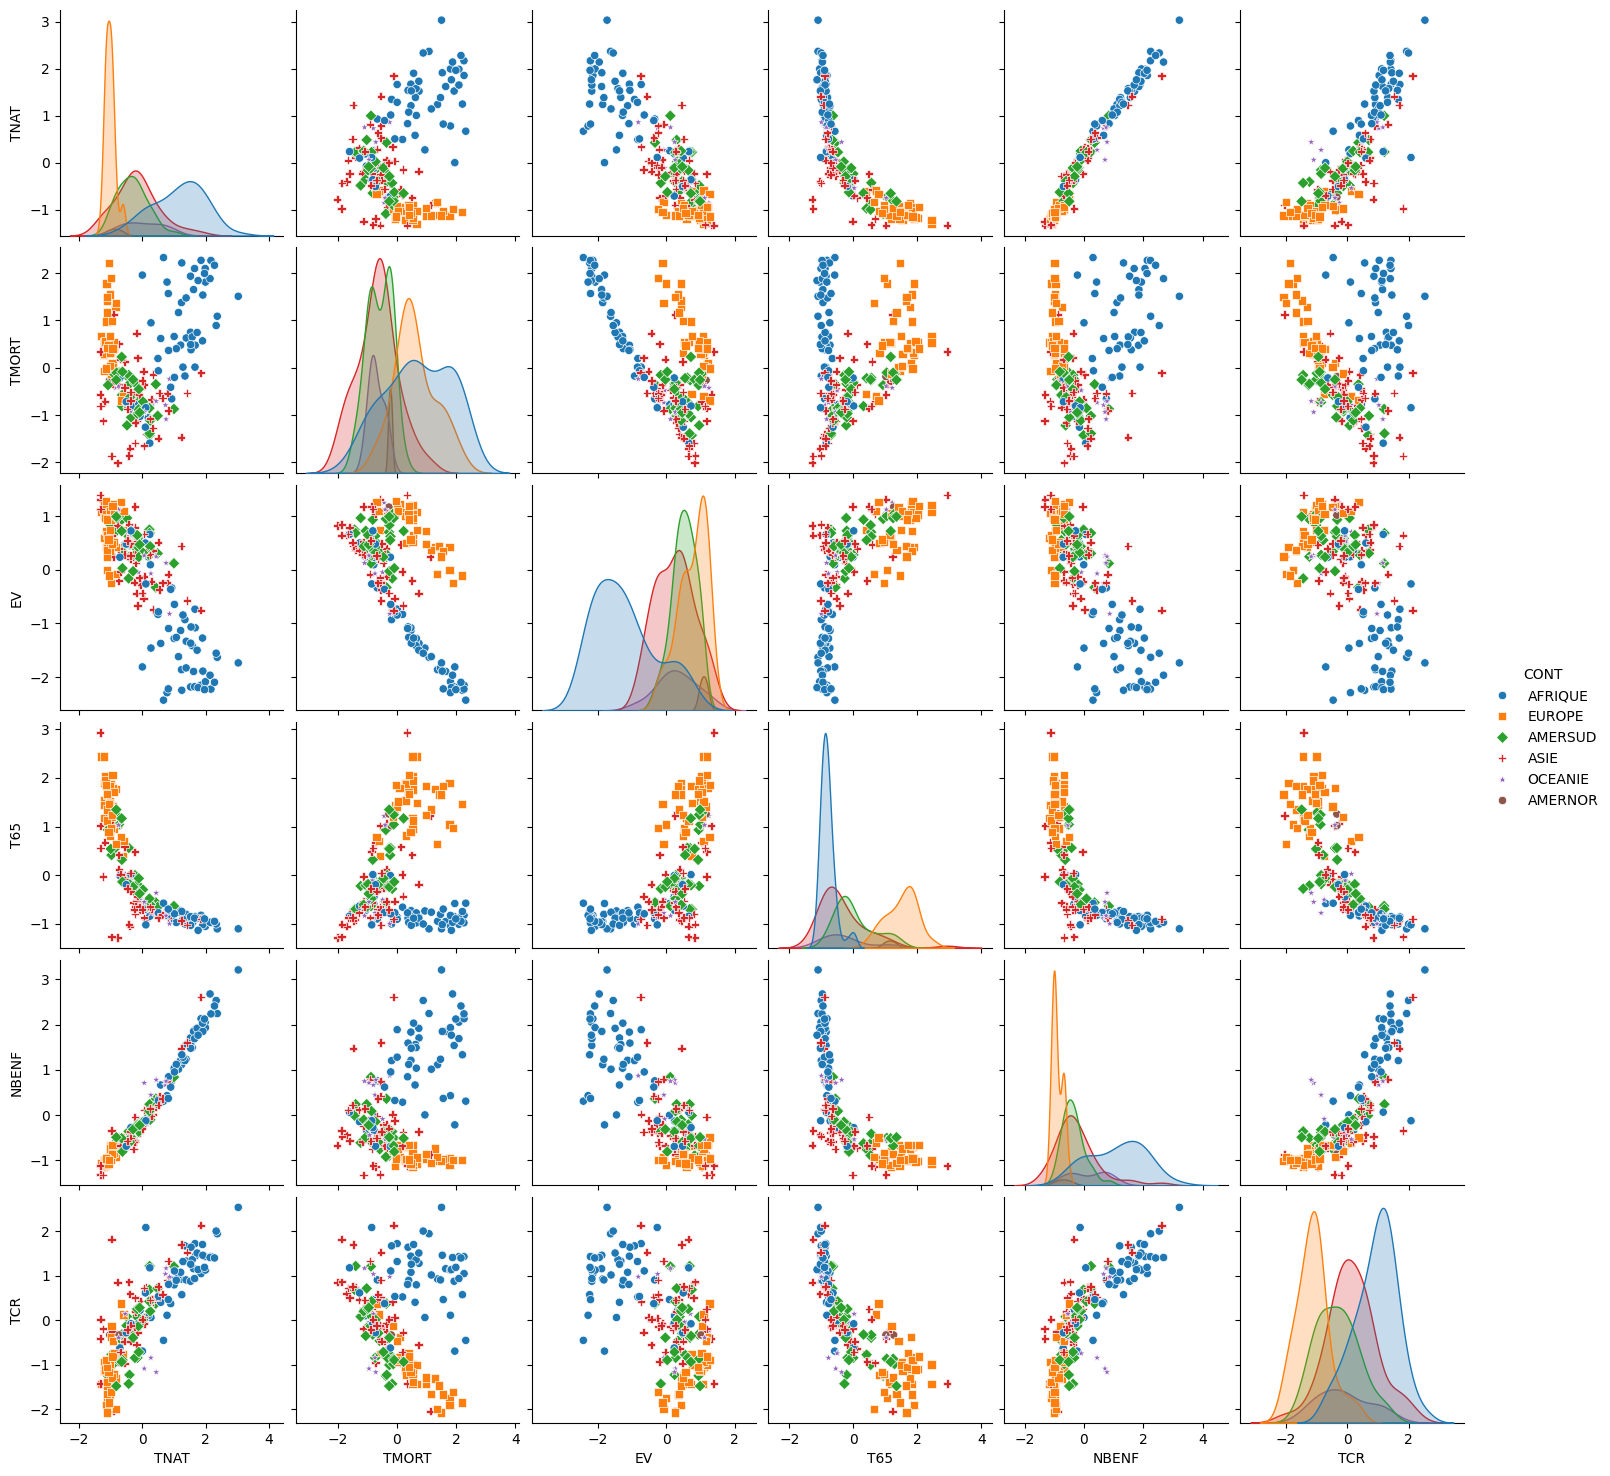

In [25]:
from sklearn.preprocessing import StandardScaler

# Centrer et réduire les variables numériques
scaler = StandardScaler()
df_clean_scaled = df_clean.copy()

# On ne centre et ne réduit que les variables numériques (pas "CONT")
df_clean_scaled[variables_to_scale] = scaler.fit_transform(df_clean[variables_to_scale])

# Tracer le pairplot avec seaborn sur les données centrées et réduites
sns.pairplot(df_clean_scaled, diag_kind="kde", hue="CONT", markers=["o", "s", "D", "P", "*"])

On remarque une tendance linéaire entre NBENF et TNAT, il serait intéressant d'en faire une analyse par régression linéaire car plus le nombre d'enfants par famille augmente, plus le taux de naissance augmente. Sauf que remis dans son contexte, il est logique que ces variables soient corrélées ensemble.

### ACP

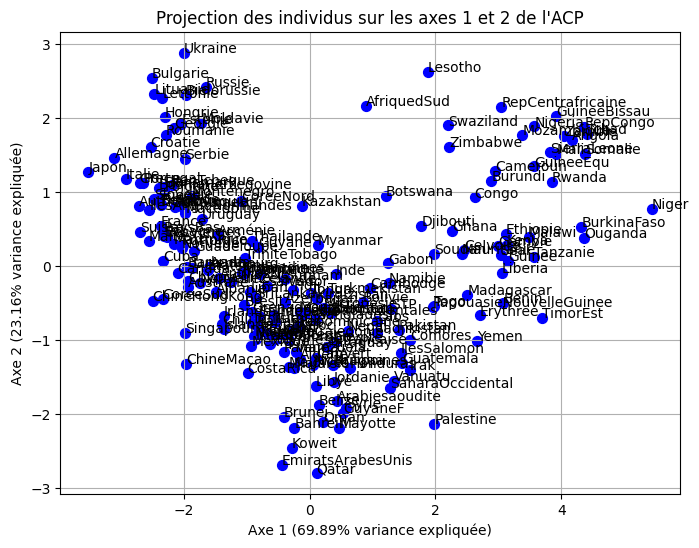

In [26]:
from sklearn.decomposition import PCA

# Réaliser l'ACP
pca = PCA()
components = pca.fit_transform(df_clean_scaled[['TNAT', 'TMORT', 'EV', 'T65', 'NBENF', 'TCR']])

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Affichage des individus sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c='blue', s=50)

# Ajouter les noms des points (optionnel, si noms des pays sont disponibles)
for i, country in enumerate(df_clean_scaled.index):
    plt.text(components[i, 0], components[i, 1], country)

# Titres et étiquettes
plt.title('Projection des individus sur les axes 1 et 2 de l\'ACP')
plt.xlabel(f'Axe 1 ({explained_variance[0]*100:.2f}% variance expliquée)')
plt.ylabel(f'Axe 2 ({explained_variance[1]*100:.2f}% variance expliquée)')
plt.grid(True)
plt.show()

### Graphique des vecteurs propres

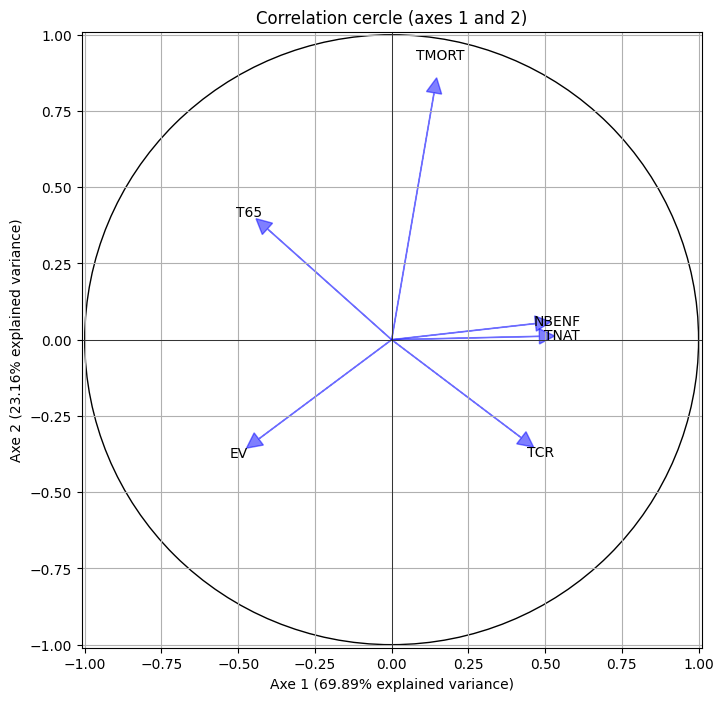

In [27]:
# Eigen vectors
components = pca.components_

# Plot
plt.figure(figsize=(8, 8))

# Pie chart
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_artist(circle)

# Abscissa and ordinate limits
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)

# Drawing eigen vectors
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(x * 1.15, y * 1.15, df_clean.columns[i], ha='center', va='center')

# Abscissa and ordinate labels
plt.xlabel(f'Axe 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained variance)')
plt.ylabel(f'Axe 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained variance)')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Correlation cercle (axes 1 and 2)")

# Plot display
plt.show()

- Le NBENF (nombre d'enfants par famille) et le TNAT (taux de natalité) sont fortement corrélés positivement. Cela signifie que plus il y a d'enfants par famille, plus le taux de natalité est élevé.

- À l'inverse, le taux de natalité et le taux de mortalité sont perpendiculaires, c'est-à-dire qu'ils n'ont aucune corrélation entre eux.

### Eigen value chart

     Comp  Eigenvalue  Percentage of Variance  Cumulative Variance
0  Comp 1    4.214866               69.885661            69.885661
1  Comp 2    1.396511               23.155201            93.040862
2  Comp 3    0.297231                4.928316            97.969179
3  Comp 4    0.099827                1.655203            99.624381
4  Comp 5    0.013322                0.220897            99.845278
5  Comp 6    0.009331                0.154722           100.000000


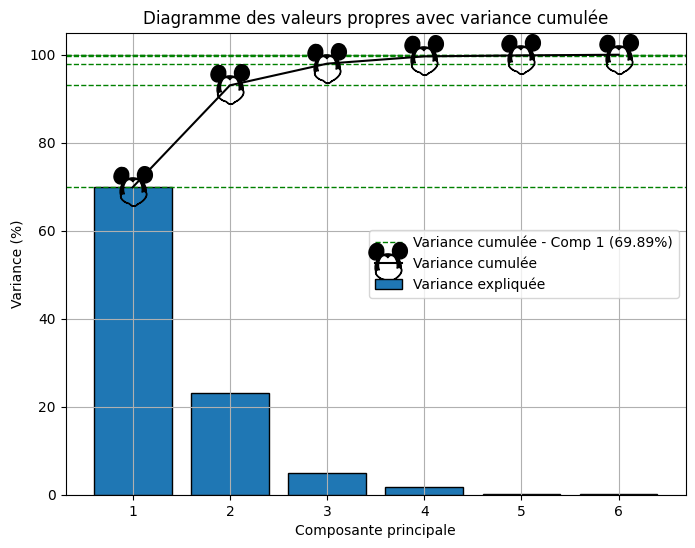

In [28]:
import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

# Eigen value
vp = pca.explained_variance_

data_vp = []
variance_sum_list = []
variance_sum = 0

for i in range(len(vp)):
    variance_sum += explained_variance[i]
    variance_sum_list.append(variance_sum*100)
    data_vp.append([f"Comp {i+1}", vp[i], explained_variance[i]*100, variance_sum_list[i]])

# Créer un DataFrame pandas
df_vp = pd.DataFrame(data_vp, columns=["Comp", "Eigenvalue", "Percentage of Variance", "Cumulative Variance"])

# Afficher le tableau
print(df_vp)

# Chart
plt.figure(figsize=(8, 6))

# Tracer les lignes horizontales pour chaque variance cumulée
for i, var_cum in enumerate(variance_sum_list):
    plt.axhline(y=var_cum, color="green", linestyle="--", linewidth=1, label=f'Variance cumulée - Comp {i+1} ({round(var_cum, 2)}%)' if i == 0 else "") 

# Custom marker
planet_path, attributes = svg2paths('../doc/mouse.svg')
planet_marker = parse_path(attributes[0]['d'])
planet_marker.vertices -= planet_marker.vertices.mean(axis=0)

# Tracer la courbe pour la variance cumulée
plt.plot(range(1, len(vp) + 1), variance_sum_list, marker=planet_marker, markersize=30, c='black', linestyle='-', label='Variance cumulée')

# Bar plot pour la variance expliquée
plt.bar(range(1, len(vp) + 1), explained_variance*100, edgecolor='black', label='Variance expliquée')

# Configuration des labels et du titre
plt.xlabel('Composante principale')
plt.ylabel('Variance (%)')
plt.title('Diagramme des valeurs propres avec variance cumulée')
plt.xticks(range(1, len(vp) + 1))
plt.grid(True)

# Légende
plt.legend()

# Afficher le graphique
plt.show()

### Contribution

In [29]:
cos2 = components**2

# Convertir en DataFrame pour faciliter l'analyse
variables = df_clean_scaled[['TNAT', 'TMORT', 'EV', 'T65', 'NBENF', 'TCR']].columns

# Créer un DataFrame pour les cos²
cos2_df = pd.DataFrame(cos2.T, index=variables, columns=[f'Axe {i+1}' for i in range(components.shape[0])])

# Affichage des cos²
print("Cos² pour chaque variable sur les composantes principales :")
print(cos2_df*100)

Cos² pour chaque variable sur les composantes principales :
           Axe 1      Axe 2      Axe 3      Axe 4      Axe 5      Axe 6
TNAT   23.149228   0.012324   3.074251  13.510091  26.396132  33.857975
TMORT   1.909745  65.550868   0.074691   6.016680  14.209725  12.238291
EV     18.747978  10.593922  19.757514   3.021638  20.654390  27.224558
T65    16.375992  13.217914  42.685492   0.071810  21.033193   6.615599
NBENF  21.958986   0.281767  15.959712  24.085135  17.657276  20.057123
TCR    17.858071  10.343205  18.448340  53.294646   0.049283   0.006455


In [30]:
# Calcul de la somme des cos² pour TNAT
sum_cos2_tnat = cos2_df.loc["TNAT"].sum()

# Afficher la somme du cos² pour TNAT
print(f"Somme du cos² pour TNAT : {sum_cos2_tnat}")

Somme du cos² pour TNAT : 0.9999999999999998


In [31]:
# Cos² pour TMORT sur chaque axe
cos2_tmort = cos2_df.loc["TMORT"]

# Afficher les cos² de TMORT
print("\nCos² de TMORT sur chaque axe :")
print(cos2_tmort)

# Identifier les axes où TMORT est bien représentée (par exemple, cos² > 0.5)
axes_tmort_bien_rep = cos2_tmort[cos2_tmort > 0.5]

print(f"\nTMORT est bien représentée sur les axes : {axes_tmort_bien_rep.index.tolist()}")


Cos² de TMORT sur chaque axe :
Axe 1    0.019097
Axe 2    0.655509
Axe 3    0.000747
Axe 4    0.060167
Axe 5    0.142097
Axe 6    0.122383
Name: TMORT, dtype: float64

TMORT est bien représentée sur les axes : ['Axe 2']


In [32]:
# Contribution des variables à l'axe 1 (cos² sur l'axe 1)
contribution_axis_1 = cos2_df['Axe 1']

# Afficher les contributions à l'axe 1
print("\nContribution des variables à l'Axe 1 :")
print(contribution_axis_1)

# Identifier les variables qui contribuent le plus à l'Axe 1 (par exemple, cos² élevé)
variables_contribuant_axis_1 = contribution_axis_1[contribution_axis_1 > 0.2]  # seuil arbitraire

print(f"\nVariables qui contribuent à l'Axe 1 : {variables_contribuant_axis_1.index.tolist()}")


Contribution des variables à l'Axe 1 :
TNAT     0.231492
TMORT    0.019097
EV       0.187480
T65      0.163760
NBENF    0.219590
TCR      0.178581
Name: Axe 1, dtype: float64

Variables qui contribuent à l'Axe 1 : ['TNAT', 'NBENF']
